# Introductory applied machine learning (INFR10069)

# Assignment 1: Data analysis and visualisation

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 18/10/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

All submissions happen electronically. To submit:

1. Fill out this notebook, and save it, making sure to **KEEP the name of the file UNCHANGED**.

1. On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

  ```submit iaml cw1 "01_Analysis.ipynb"```

  What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.
  
1. **Distance Learners:** To copy your work onto DICE (so that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example (replace entries in `[square brackets]` with your specific details):
```
filename="01_Analysis.ipynb"
local_scp_filepath=[DIRECTORY CONTAINING GIT REPOSITORY]${filename}
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
ssh [YOUR USERNAME]@${server_address}
ssh student.login
submit iaml cw1 "01_Analysis.ipynb"
```

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [6]:
%matplotlib inline

import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

sys.path.append('..')
from utils.plotter import scatter_jitter, plot_confusion_matrix

## Description of the dataset

This assignment is based on the 20 Newsgroups Dataset. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

There are three versions of the 20 Newsgroups Dataset. In this assignment we will use the `bydate` matlab version in which documents are sorted by date into training (60%) and test (40%) sets, newsgroup-identifying headers are dropped and duplicates are removed. This collection comprises roughly 61,000 different words, which results in a bag-of-words representation with frequency counts. More specifically, each document is represented by a 61,000 dimensional vector that contains the counts for each of the 61,000 different words present in the respective document. 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. The class is conveniently stored in the `class` column. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related. Additionally, we computed the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) of each word with the class attribute and selected the some words out of 61,000 that had highest mutual information. For very sophisticated technical reasons (which you should know!) 1 was added to all the word counts in part 1. The resulting representation is much more compact and can be used directly to perform our experiments in Python.

**Hint**: The data was preprocessed by a very busy PhD student... and hence should never be taken to be perfect at face value!

## 1. Exploration of the dataset

Your first task is to get a feel for the data that you will be dealing with in the rest of the assignment.

### ========== Question 1.1 --- [10 marks] ==========

1. [Code] Load the dataset `raw_20news.csv` into a data-frame called `news_raw`. Using pandas methods we learnt in class, extract some basic information about the data. 

1. [Text] In a short paragraph, summarise the key features of the dataset. *Hint: Look at what we did in the labs.*

In [7]:
# (1) # Your Code goes here:

# Let's set the path and read the data...
data_path = os.path.join(os.getcwd(), 'datasets', 'raw_20news.csv')
news_raw = pd.read_csv(data_path, delimiter = ',')

# To get some insights of the structure 
print("- The number of attributes is",news_raw.shape[1]-1,
      ",and the size of the training data is",news_raw.shape[0])

# Check if there are NaN values
if news_raw.isnull().values.any():
    print ("NaN values!")
else:
    print("- No NaN values") 

# Check if missing values
if news_raw.isnull().values.any():
    print("Missing values!")
else:
    print("- No missing values")
    
# Let's check the distribution of the classes
class_freq = pd.DataFrame((news_raw.groupby('class').size()))
class_freq.columns = ['Frequency of each class']

# Display class frequencies 
display(class_freq)

# Display descriptive statistics
display(news_raw.describe())

# Display first five rows of dataframe
display(news_raw.head())

- The number of attributes is 520 ,and the size of the training data is 2129
- No NaN values
- No missing values


,Frequency of each class
class,
1,368
2,427
3,427
4,454
5,453


,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.00000,2129.000000,2129.000000,2129.000000,2129.000000,...,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000
mean,5.128229,6.097698,6.120244,5.551902,5.521841,6.12776,5.633161,6.090653,5.970409,5.624706,...,9.666510,9.217473,9.061531,9.398309,9.175200,9.708783,8.807891,9.719587,9.307656,3.092532
std,38.292577,46.190953,46.656022,40.953913,40.978098,45.96434,41.146918,45.762060,44.266628,40.769105,...,45.844064,43.948910,40.969185,43.833064,42.403283,47.294120,39.341038,46.185082,45.059367,1.395948
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,4.000000
max,572.000000,583.000000,579.000000,580.000000,591.000000,600.00000,546.000000,591.000000,578.000000,578.000000,...,590.000000,587.000000,577.000000,598.000000,568.000000,599.000000,585.000000,600.000000,597.000000,5.000000


,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
0,1,1,1,1,1,1,1,1,1,1,...,1,5,3,6,8,4,6,4,8,4
1,1,1,1,1,1,1,1,1,1,1,...,2,3,6,8,3,4,5,6,5,4
2,1,1,1,1,1,1,1,1,1,2,...,4,2,6,5,2,5,5,7,8,2
3,1,1,1,1,1,1,1,1,1,1,...,6,3,6,1,1,8,1,8,4,3
4,1,1,1,1,1,1,1,1,1,1,...,6,1,7,8,6,3,1,8,4,3


(2) ***Your answer goes here:***

The dataset has 2129 examples, and each one is described by 521 features (520 variables and the class). The quality of the data seems pretty good a priory:

- No missing values
- No NaN values
- No skewed data

I also present the descriptive statistics of the data. Words such as __*aaa*__ appear in average 5 times, while __*surface*__ appears in average 9 times. This behaviour was expected, but the standard deviation takes very large values. These large values along with the maximum values of each feature contrast with the small values of the 75th percentile. This may indicate the presence of outliers in our data.

The first five rows of the data set are presented to get a feel of its features.

### ========== Question 1.2 ---  [6 marks] ==========
1. [Code] Display the names of some of the attributes in the training datset. 
1. [Text] Describe the output and comment (1 or 2 sentences) keeping in mind the selection procedure for the features.

In [8]:
# (1) # Your Code goes here:

# We use seed to get always the same random results
np.random.seed(9001)
# Create a list of the features names
features = news_raw.columns
# I chose to display 8 features
num = 8
rnd_features = list(np.random.choice(features, num, replace=False))
print("These are",num,"attributes selected at random: \n \n", rnd_features)

These are 8 attributes selected at random: 
 
 ['w313_hi', 'w450_rangers', 'w11_buying', 'w470_him', 'w321_beat', 'w497_mac', 'w209_why', 'w290_by']


(2) ***Your answer goes here:*** 

The selected words for the exercise are those with the highest mutual information with the classes, i.e the most frequent words in the classes. I would classify them in two groups:
- __Words very related to the classes__ : ___mac___ and ___buying___ are expected to be very common in classes 2 and 3, and ___rangers___ and ___beat___ can be frequently found in class 4 and 5. Probably ___why___ is related to class 1.
- __Stopswords__: Very common words in English, but probably they do not give class information. For example: ___hi___ and ___by___. There are libraries such as nltk that can help on this task. 

__Note aside__: Per class distribution, for every word with high mutual information with class 1, we expect to see 2 with high mutual information with classes 2 and 3, and another 2 with high mutual information with classes 4 and 5. 

### ========== Question 1.3 --- [4 marks] ==========
Familiarise yourself with the [`stripplot`](https://seaborn.github.io/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot) function in `seaborn`. 

1. [Code] Pick one attribute of your choice (except `class`) and display a stripplot for that attribute for dataset **A**. Demonstrate the distribution of the data separately for each class (by making appropriate use of the `x` argument in `stripplot`). Set the `jitter` argument to `True` and the `alpha` argument to an appropriate value (to add transparency). When the jitter parameter is enabled a small amount of noise is added to the data so that there is less overlap and the distribution is easier to visualise. 

1. [Text] Mention anything peculiar you observe in the Data.

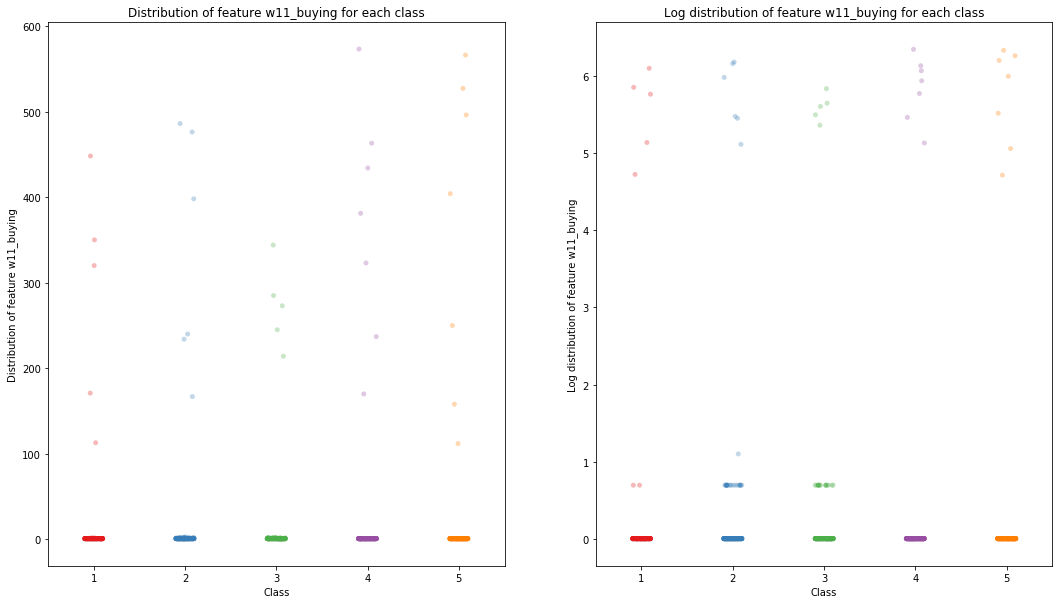

In [9]:
# (1) # Your Code goes here:

# Set the plot size
f, axes = plt.subplots(1, 2,figsize=(18,10))

# I selected the word w11_buying
sns.stripplot(x="class", y=news_raw["w11_buying"],
              palette="Set1", data=news_raw,
              jitter =True,alpha=.3, ax=axes[0])

# Set title and axes label
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Distribution of feature w11_buying')
axes[0].set_title('Distribution of feature w11_buying for each class')
plt.sca(axes[0])

# Let's plot the same information but now in log scale
sns.stripplot(x="class", y=np.log(news_raw["w11_buying"]),
              palette="Set1", data=news_raw,
              jitter =True,alpha=.3, ax = axes[1])

# Set title and axes label
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Log distribution of feature w11_buying')
axes[1].set_title('Log distribution of feature w11_buying for each class')
plt.sca(axes[1])

(2) ***Your answer goes here:*** 

The plot on the left illustrates that in few data points the word *__buying__* appears a large number of times. This visualization helps to understand the large standard deviation values mentioned in __Q.1.1__.

On the right, I plotted the log distribution of the same word. This scale change is like a zoom in that shows clearly that most of the distribution takes place between 1-10. 

__Note aside:__ In question __Q.1.2__ I inferred that ___buying___ was expected to be very frequent in classes 2 and 3. Indeed, the plot on the right shows that this word appears more times in these two classes than in the other three.

### ========== Question 1.4  --- [8 marks] ==========
Let us analyse this further. The stripplot illustrates the distribution of a single attribute. We can also visualise the joint distribution of two variables by using a scatter plot. Again, we want to add a bit of jitter into the data so that is easier to see which parts of the space (2-dimensional in our case) have larger probability densities. For this, you will be using the function `scatter_jitter` from the `utils` library which we provided. This function takes as input two numpy arrays containing the features of interest. 

1. [Code] First, pick two attributes of your choice from dataset A and use the provided function to plot their joint distribution. Do this twice (i.e. pick 4 attributes and do plots between two pairs: you do not need to plot between each possible pair). You can play around with the amount of noise added by tweaking the `jitter` parameter. Alternatively, you can just use its default value which is set to 0.2. Label the axes appropriately.

1. [Text] Do these plots increase or reduce the possibility of the data-set containing outliers? Why or why not? How would you visualise the data to verify this? **N.B. There is no need to code anything for this part, just indicate a reasonable type of plot, and what you expect to see.**

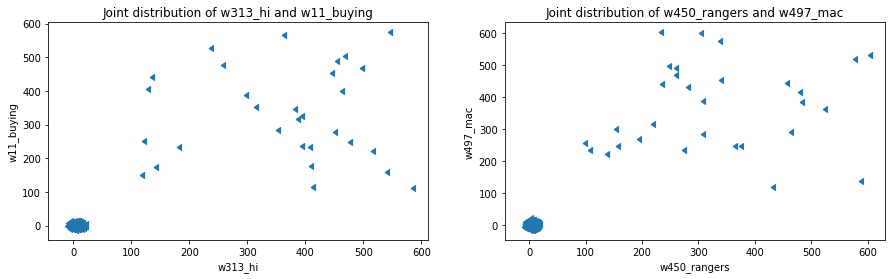

In [10]:
# (1) # Your Code goes here:

# Define the variable pairs to plot
variables = [['w450_rangers','w497_mac'],['w313_hi','w11_buying']]

# Subplot
fig, axs = plt.subplots(1,2,figsize=(15,4))

j = 0
# Plotting each subplot
for i in axs :
    scatter_jitter(news_raw[variables[j][0]], 
                   news_raw[variables[j][1]],
                   jitter = 0.1)
    
    plt.xlabel(variables[j][0])
    plt.ylabel(variables[j][1])
    str_variables = variables[j][0] + ' and ' + variables[j][1]
    plt.title('Joint distribution of %s' %(str_variables))
    plt.sca(axs[j])
    j += 1

(2) ***Your answer goes here:***

These plots increase the possibility that our data set has outliers because most data points are somewhere between 1 and 10, but few of them take large values. Also, these large values might come from the same source because the amount of large values is the similar in both cases. 

For example, I would do the mean of every data point (we saw that inliers usually take values between 1 and 10) and see the distribution. See below.

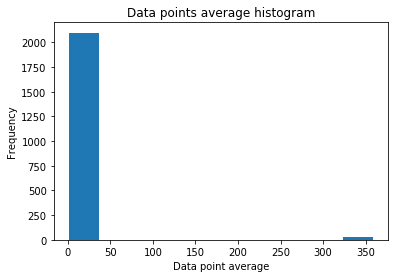

In [11]:
# Create mean column
news_raw["mean"] = news_raw.mean(axis=1)
# Plot easy histogram
plt.hist(news_raw["mean"], bins=10)
plt.xlabel("Data point average")
plt.ylabel("Frequency")
plt.title("Data points average histogram")
# Drop new column
news_raw.drop('mean', axis=1, inplace=True)

The above plot shows that teh average of each data point is between 0-50 expect for few values that is around 300.

### ========== Question 1.5 --- [15 marks] ==========
We want to get rid of the potential outliers in the data. Your job now is to create a new dataset from `news_raw` (name it `news_clean`) and remove the outliers.

1. [Text] Decide on a criterion to find the outliers and argue why it is reasonable. 
1. [Code] Then implement it and visualise the result (in terms of your criterion). **Be careful** not to alter the original dataset as we will need it later. 
1. [Text] Finally report the number of points in the cleaned dataset, and the number rejected as outliers and comment on the result

(1) ***Your answer goes here:***

A good method to deal with outliers is percentiles. This measure orders the data from the lowest to the highest values, and returns the relative standing of a particular value in the data set. This is a good method because it is based on the ***median*** ( not very sensitive to outliers). Another approach is to study the standard deviation, but I do not like it because it is very sensitive to outliers (because is calculated based on the mean).

I will use the ___quatile___ function to remove all the points that are over a percentile threshold to minimize the standard deviation, but keeping the maximum number of data points. I want to minimize the standard deviation because it takes unreasonable large values because of the outliers. So, I expect to see a reasonable standard deviation after cleaning the data.

Here I am just reporting the final results, the percentile threshold was decided by a handy task of trial and error.

__Note aside:__ Probably an easy method is to remove all values greater than 50, but I prefer to take a scientific approach.

In [12]:
# (2) # Your Code goes here:

# Copy news_raw to news_clean
news_clean = news_raw.copy(deep=True)

# Drop column class because I don't want it to be affected by the quantile function
news_clean.drop('class', axis=1, inplace=True)

# Define quantile
quantile = news_clean.quantile([0.995])

# Filter the data
news_clean = news_clean.apply(lambda x: x[(x < quantile.loc[0.995,x.name])])

# Add again the column class
news_clean = pd.concat([news_raw.loc[:,'class'], news_clean], axis=1)

# Drop outliers
news_clean.dropna(inplace = True)

# Create a list of the inlier indices, I will use ...
# this to filter the news_raw to get the outliers
idc_list = news_clean.index.values

# Create a dataframe with the outliers
news_outliers = news_raw[~news_raw.index.isin(idc_list)]

print("- The number of outliers is:",news_outliers.shape[0],"\n"
      "- The number of data points in the cleaned data set:", news_clean.shape[0])

display(news_outliers.head())

- The number of outliers is: 30 
- The number of data points in the cleaned data set: 2099


,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
123,106,583,395,336,309,505,238,361,140,469,...,329,213,296,305,331,541,398,444,200,5
159,211,561,565,277,181,418,165,216,528,331,...,536,540,177,216,526,218,459,356,284,2
196,207,115,166,455,365,436,305,536,232,274,...,248,318,235,335,377,231,225,458,251,5
222,428,227,245,463,426,468,164,510,315,154,...,161,240,203,163,436,410,289,380,576,4
242,318,543,379,543,286,207,305,475,458,123,...,180,203,263,227,429,123,339,309,417,1


In [23]:
class_freq = pd.DataFrame((news_outliers.groupby('class').size()))
class_freq.columns = ['Frequency of each class']

# Display class frequencies 
display(class_freq)

,Frequency of each class
class,
1,5
2,6
3,5
4,7
5,7


(3) ***Your answer goes here:***

The number of outliers detected with this approach is 30 data points, so the cleaned data set has 2099 examples. I also displayed some outliers too see their pattern. It looks like that the outliers come from a source of noise because all the features of any outlier data point are infected by big numbers. 

Removing the outliers decreased drastically the standard deviation of each attribute, and now they take reasonable values.

# ========== Question 1.6 --- (LEVEL 11) --- [10 marks] ==========

1. [Code] Visualise some of the outlier documents and some of the inlier ones. 
1. [Text] Comment on the observations. Also comment on whether it is appropriate to do such cleaning on just the training data or on the entire data-set (including testing).

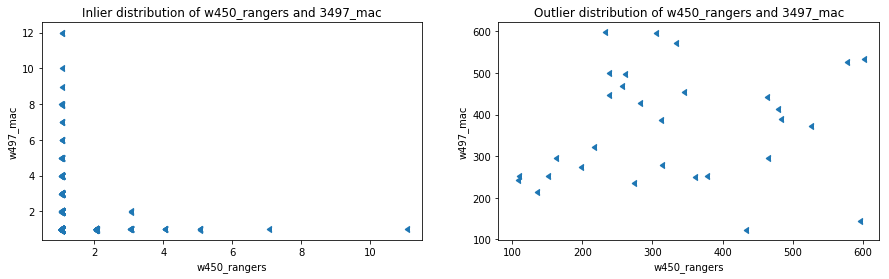

In [13]:
# (1) # Your Code goes here:

#Variables to plot
variables = ['w450_rangers','w497_mac']

#Subplot
fig, axs = plt.subplots(1,2,figsize=(15,4))

# Plot outliers
scatter_jitter(news_outliers[variables[0]], 
               news_outliers[variables[1]],
               jitter = 0.01)

plt.xlabel(variables[0])
plt.ylabel(variables[1])
plt.title('Outlier distribution of w450_rangers and 3497_mac')
plt.sca(axs[0])

# Plot inliers
scatter_jitter(news_clean[variables[0]], 
               news_clean[variables[1]], 
               jitter = 0.01)

plt.xlabel(variables[0])
plt.ylabel(variables[1])
plt.title('Inlier distribution of w450_rangers and 3497_mac')
plt.sca(axs[1])

(2) ***Your answer goes here:*** 

On the left, the scatter plot of inliers shows that the word counts are compressed between 1-15. I plotted two words,  ___mac___ and ___rangers___, that a priory have nothing in common (there is no dependencies between them), and indeed this plot shows no dependency between these two words.

On the right, the scatter plot shows a noisy distribution of the outliers of these same words. This time the distribution shows some dependency between the two words ( probably originated by the noise), whereas on the left we see that the features are independent (perpendicular).

The cleaning only should be performed in tha training set. The training set is cleaned to build a model based on data points that have both statistical and conceptual sense. However, we want to see how our model response to outliers because the test set is to check if the model is reasy for the "go life".

## 2. Naive Bayes classification
Now we want to fit a Gaussian Naive Bayes model to the cleaned dataset. You might want first to familiarise yourself with the [`GaussianNB`](http://scikit-learn.org/0.19/modules/generated/sklearn.naive_bayes.GaussianNB.html) class in `Sklearn`.

### ========== Question 2.1 --- [6 marks] ==========

Load the cleaned datasets `train_20news.csv` and `test_20news.csv` into pandas dataframes `news_train` and `news_test` respectively. Using pandas summary methods, confirm that the data is similar in both sets.

In [14]:
# Your Code goes here:
# Let's set the path and read the data...
train_data_path = os.path.join(os.getcwd(), 'datasets', 'train_20news.csv')
test_data_path = os.path.join(os.getcwd(), 'datasets', 'test_20news.csv')
news_train = pd.read_csv(train_data_path, delimiter = ',')
news_test = pd.read_csv(test_data_path, delimiter = ',')

#L et's check the prior probability of each class
print("Both training and test data sets are very similiar. It looks like both data sets are free of outliers,",
      "and the test set is    representative in the training set. I.e all the counts of the test set fall in ",
     "the range described for the training set.")
print("\033[1m"+"\n Training data description")
display(news_train.describe())
print("\033[1m"+"Test data description")
display(news_test.describe())

Both training and test data sets are very similiar. It looks like both data sets are free of outliers, and the test set is    representative in the training set. I.e all the counts of the test set fall in  the range described for the training set.

 Training data description


,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,...,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000
mean,1.025727,1.017627,1.014769,1.008576,1.006193,1.010481,1.026203,1.024297,1.012387,1.084326,...,4.574083,4.464983,4.533111,4.557885,4.531682,4.514531,4.509290,4.521201,4.412577,3.091472
std,0.280109,0.205208,0.172657,0.115206,0.078473,0.134174,0.618880,0.274219,0.153879,0.491139,...,2.283028,2.273922,2.329654,2.292246,2.333558,2.259005,2.287548,2.295995,2.296504,1.395628
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,6.000000,7.000000,7.000000,7.000000,6.000000,7.000000,6.500000,6.000000,4.000000
max,8.000000,7.000000,5.000000,4.000000,2.000000,4.000000,28.000000,5.000000,4.000000,16.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,5.000000


Test data description


,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,128.000000,128.000000,128.0,128.0,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.00000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,1.007812,1.031250,1.0,1.0,1.007812,1.015625,1.007812,1.039062,1.015625,1.085938,...,4.757812,4.351562,4.593750,4.445312,4.53125,4.453125,4.687500,4.421875,4.531250,3.078125
std,0.088388,0.278847,0.0,0.0,0.088388,0.124507,0.088388,0.291678,0.124507,0.281373,...,2.201453,2.175706,2.438011,2.387001,2.31373,2.383868,2.390104,2.285212,2.370878,1.400840
min,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,2.000000,2.000000,2.75000,2.000000,2.750000,2.000000,2.000000,2.000000
50%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,4.000000,4.00000,5.000000,5.000000,4.000000,5.000000,3.000000
75%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,6.000000,7.000000,7.000000,6.25000,7.000000,7.000000,6.000000,7.000000,4.000000
max,2.000000,4.000000,1.0,1.0,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,...,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,5.000000


### ========== Question 2.2 --- [4 marks] ==========

[Text] Answer (in brief) the following two questions:
1. What is the assumption behing the Naive Bayes Model?
1. What would be the main issue we would have to face if we didn't make this assumption?

(1/2) ***Your answer goes here:***

1. Naive Bayes Model assumes that the atributtes are conditionally independent given class. In other words, the dependence between the features is explained by the value of the class. 


2. If we didn't make this assumption, the computationall cost would be much higher (basically because space complexity):
    - Space complexity would increase. The algorithm would need to deal with a spare covariance matrix of NxN (N = number of features) to calculate all the dependencies between the features, and much more data would be required to calculate all the dependencies.  In contrast, the Naive Bayes achieves respectable results with small data sets, and its space complexity is O(n·c), where n the number of features and c number of classes.
    - Time complexity would increase exponentially on the number of features, while time complexity is linear on the number of features in the Naive Bayes algorithm.
     

### ========== Question 2.3 --- [8 marks] ==========

1. [Code] By using the `scatter_jitter` function, display a scatter plot of the features `w281_ico` and `w273_tek` for the **cleaned** dataset A. Set the jitter value to an appropriate value for visualisation. Label axes appropriately.
1. [Text] What do you observe about these two features? Does this impact the validity of the Naive Bayes assumption? Why or why not?

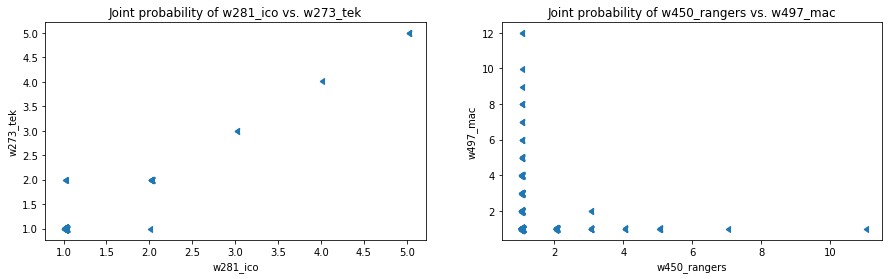

In [15]:
# (1) # Your Code goes here:
fig, axs = plt.subplots(1,2,figsize=(15,4))

### Begining of extra code
###
# Added to compare independent words
# Let's call the scatter function
_=scatter_jitter(news_train['w450_rangers'], 
               news_train['w497_mac'], jitter = 0.02)

# Set axes labels and titles
plt.xlabel('w450_rangers')
plt.ylabel('w497_mac')
plt.title('Joint probability of w450_rangers vs. w497_mac')
plt.sca(axs[0])
###
### End of extra code


# Let's call the scatter function
_=scatter_jitter(news_train['w281_ico'], 
               news_train['w273_tek'], jitter = 0.02)

# Set axes labels and title
plt.xlabel('w281_ico')
plt.ylabel('w273_tek')
plt.title('Joint probability of w281_ico vs. w273_tek')
plt.sca(axs[1])

(2) ***Your answer goes here:***

The image on the left shows that there's a positive correlation between the two features. This does not impact our assumption because it is acceptable to use Naive Bayes if the dependency between the variables is explained by the class. In other words, the Naive Bayes algorithm will perform well if the dependency between the two variables is because of the class, but it will be weak if the dependency is because another reasons.

I also plotted on the right the correlation between two words that, by the context, should be totally independent ___mac___ and ___rangers___. As the image shows, there is no dependency between them. This is good news because we expect ___mac___ to be associated with classes 2 and 3, while ___rangers___ with classes 4 and 5. A dependency between these two words would make us to reconsider whether or not to apply Naive Bayes in this problem.

### ========== Question 2.4 --- [7 marks] ==========
1. [Text] What is a reasonable baseline against which to compare the classiffication performance? *Hint: What is the simplest classiffier you can think of?*. 
1. [Code] Estimate the baseline performance on the *training* data in terms of classification accuracy.

(1) ***Your answer goes here:***

The simplest classifier a can come up with is a classifier based on the prior class probability. Since the class distribution it is pretty balance, this baseline method would give the same results as a random classifier. As you can see below, the accuracy of this method on the training data is always around 20%, which is basically the same result of selecting at random among 5 different classes.

In [16]:
# (2) # Your Code goes here:

# Let's check the distribution of the classes
class_freq = pd.DataFrame((news_train.groupby('class').size()))
prob = class_freq.to_dict('dict')
class_freq.columns = ['Prior probability']

# Display class frequencies 
print("Table of the prior probability")
display(100*(class_freq/(news_train.shape[0])).round(3))

# Let's build a model based on this
# Convert the dataframe to dictionary
prob = class_freq.to_dict('dict')
prob = prob['Prior probability']
# Segregate dictionary to tuple, this will allow us to make
# selections based on the weight of each class
keys = [*prob]
counts = list(prob.values())
probs = [i/sum(counts) for i in counts]

# Get the output of the training
y_prior = news_train['class']
y_prior.shape[0]
# Predict training data with the baseline method
# I use np.random.choice, it selects a value at random based on its probabilities
y_pred_prior = np.random.choice(keys,y_prior.shape[0],p=probs, replace=True)

# Calculate accuracy of our baseline method
prior_accuracy = accuracy_score(y_prior,y_pred_prior)
print("The accuracy of the baseline method on the training set is:",(100*prior_accuracy).round(1),"%")

Table of the prior probability


,Prior probability
class,
1,17.3
2,20.1
3,20.1
4,21.3
5,21.2


The accuracy of the baseline method on the training set is: 20.3 %


<a id='question_2_5'></a>
### ========== Question 2.5 --- [12 marks] ==========

1. [Code] Fit a Gaussian Naive Bayes model to the cleaned dataset. 

1. [Code] Report the classification accuracy on the **training** dataset and plot a Confusion Matrix for the result (labelling the axes appropriately).

1. [Text] Comment on the performance of the model. Is the accuracy a reasonable metric to use for this dataset?

*Hint: You may make use of utility functions we provided, as well as an sklearn method for computing confusion matrices*

In [17]:
# (1) # Your Code goes here:

# From the training set, we store the features on X, and the outputs on y
X = news_train.drop('class', axis=1)
y = news_train['class']
#Define our algorithm
clf = GaussianNB(priors=None)
#Training our algorithm
clf.fit(X,y)

GaussianNB(priors=None)

The accuracy of the Gaussian Naive Bayes on the training set is: 87.8 %


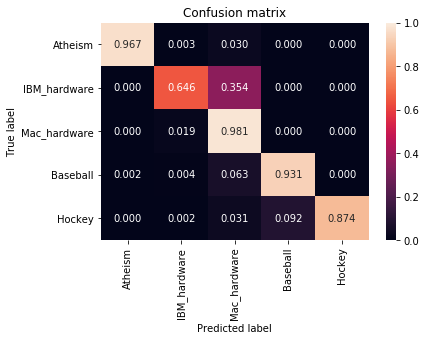

In [18]:
# (2) # Your Code goes here:
# Predit training set and calculate accuracy
y_pred = clf.predict(X)
accuracy = accuracy_score(y,y_pred)

print("The accuracy of the Gaussian Naive Bayes on the training set is:",100*accuracy.round(4),"%")

#Calculating confusion matrix from sklearn 
conf_matrix = confusion_matrix(y,y_pred)
norm_confmx = conf_matrix/conf_matrix.sum(axis=1).reshape(5,1)

# I decided to print the cleaned name of each class to make it visually easy
classes = ['Atheism','IBM_hardware', 'Mac_hardware','Baseball','Hockey']

plot_confusion_matrix(norm_confmx,classes = classes)

(3) ***Your answer goes here:***

The accuracy on the training set is 87.8%, which is good considering that it is a naive classifier. The accuracy is a good metric to test the overall performance of the predictive model because is the ratio of all the correct predictions and all the predictions. If we want to get more information of each class we can use confusion matrix or ROC curves.

### ========== Question 2.6 --- [3 marks] ==========

[Text] Comment on the confusion matrix from the previous question. Does it look like what you would have expected? Explain.

***Your answer goes here:***

The confusion matrix looks like as expected:
- Class 1 (Atheism) - The class with higher accuracy. This is because there is no other class closely related to this one, and it is easy for the classifier to distinguish this class from the others.

- Classes 2(IBM_hardware)-3(Mac_hardware) are closely related, so the classifier mispredits some data points. It is interesting to say that the classifier mispreditcs very often the class 2, and it does much better prediction on class 3. This may be explained by the fact that the distribution of features in class 3 is more diverse than in class 2. I.e. the articles related to class 3 are richer in vocabulary than in those of class 2.

- Classes 4(Baseball)-5(Hockey)  are also closely related, so the classifier does not perform that well as in class 1. The classifier misclassifies few times class 5 into class 4. Again, probably the vocabulary used in class 4 is richer than that in class 5. 

### ========== Question 2.7 --- [12 marks] ==========

Now we want to evaluate the generalisation of the classifier on new (i.e. unseen data). 

1. [Code] Use the classifier you trained in Question [2.5](#question_2_5) (i.e. on the cleaned dataset) and test its performance on the test dataset. Display classification accuracy and plot a confusion matrix of the performance on the test data. 

1. [Code] Also, reevaluate the performance of the baseline on the test data.

1. [Text] In a short paragraph (3-4 sentences) compare and comment on the results with the training data/baseline.

The accuracy of our model on the test set is: 82.0


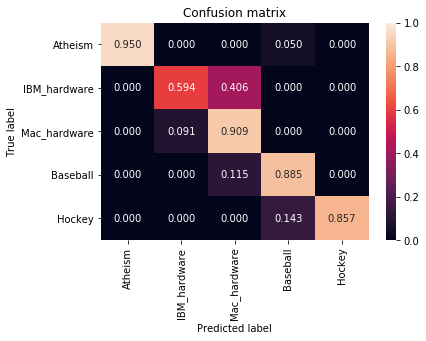

In [19]:
# (1) # Your Code goes here:
X_test = news_test.drop('class', axis=1)
y_test = news_test['class']

y_test_pred = clf.predict(X_test)

test_accuracy = accuracy_score(y_test,y_test_pred)
print("The accuracy of our model on the test set is:",(100*test_accuracy).round())

#Calculating confusion matrix from sklearn 
test_conf_matrix = confusion_matrix(y_test,y_test_pred)
test_norm_confmx = test_conf_matrix/test_conf_matrix.sum(axis=1).reshape(5,1)

# I decided to print the cleaned name of each class to make it visually easy
classes = ['Atheism','IBM_hardware', 'Mac_hardware','Baseball','Hockey']

plot_confusion_matrix(test_norm_confmx,classes = classes)

In [20]:
# (2) # Your Code goes here:

#Predict training data with the baseline method
y_test_prior = np.random.choice(keys,y_test.shape[0],p=probs, replace=True)

prior_test_accuracy = accuracy_score(y_test,y_test_prior)
print("The accuracy of the baseline method on the test set is:",(100*prior_test_accuracy).round(1),"%")

The accuracy of the baseline method on the test set is: 28.9 %


(3) ***Your answer goes here:***

The accuracy of the baseline method on the test set is always around on 20%, which is the same results as in the training set. This results makes sense because our baseline classifier it is based on the prior probability of the classes of the training set, i.e the features does not impact on the baseline model. The baseline classifier will give the same results for any data set.

### ========== Question 2.8 --- (LEVEL 11) --- [7 marks] ==========
1. [Code] Fit a Gaussian Naive Bayes model to the original raw dataset (including the outliers) and test its performance on the **test** set. 

1. [Text] Comment on the output and explain why or why not cleaning affects the classifier.

The accuracy of the raw data based on the raw data is: 20.5 %
The accuracy of the test set based on the raw data model is: 17.2 %


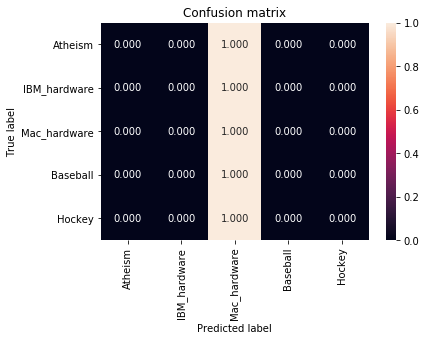

In [21]:
# (1) # Your Code goes here:

#Separete data
X_raw = news_raw.drop('class', axis=1)
y_raw = news_raw['class'].copy(deep=True)

#Define classifier and fit
clf_raw = GaussianNB(priors=None)
clf_raw.fit(X_raw,y_raw)

#Predict and calculate accuracy
y_raw_pred = clf_raw.predict(X_raw)
raw_accuracy = accuracy_score(y_raw, y_raw_pred)

print("The accuracy of the raw data based on the raw data is:",(100*raw_accuracy).round(1),"%")

y_test_raw = clf_raw.predict(X_test)
test_raw_accuracy = accuracy_score(y_test,y_test_raw)
print("The accuracy of the test set based on the raw data model is:",(100*test_raw_accuracy).round(1),"%")

test_conf_matrix = confusion_matrix(y_test,y_test_raw)
test_norm_confmx = test_conf_matrix/test_conf_matrix.sum(axis=1).reshape(5,1)

plot_confusion_matrix(test_norm_confmx,classes = classes)

In [22]:
class_3 = news_raw[news_raw["class"] == 3]
mu, std =class_3.mean(0), class_3.std(0)
mu

w1_aaa              4.281030
w2_pins             4.503513
w3_kmr              5.824356
w4_notion           4.138173
w5_queens           4.433255
w6_dwyer            6.367681
w7_defenseman       5.074941
w8_gld              5.238876
w9_tocchet          6.147541
w10_home            5.819672
w11_buying          4.210773
w12_internet        5.501171
w13_slots           4.213115
w14_compatible      4.892272
w15_transfer        5.995316
w16_baltimore       3.377049
w17_mean            3.974239
w18_person          5.241218
w19_performance     5.861827
w20_support         4.941452
w21_tor             4.728337
w22_gm              6.304450
w23_mouse           5.412178
w24_base            4.990632
w25_population      5.803279
w26_bob             6.395785
w27_set             5.758782
w28_it              7.496487
w29_earth           5.367681
w30_faith           4.744731
                      ...   
w492_nhl            5.791569
w493_he             4.576112
w494_season         6.037471
w495_baseball 

(2) ***Your answer goes here:***

The model trained on the ***news_raw*** is weaker than that trained on the cleaning data. These results show the importance of cleaning the data before building any model. In general, it is always good to inspect and process the data to increase its quality. In this exercise we just removed outliers, but in other problems we can create more variables, change their scale, remove features etc.

The confusion matrix shows that this predictor classifies all data points to class 3 ( Mac_hardware). This may happends because class 3 (Mac_hardware) is less affected by outliers compared to the others classes. Mathematically, for class 3 (Mac_hardware):

\begin{align}
P(y=3|\mathbf{X}) \propto P(\mathbf{X}| y =3)·P(y=3)
\end{align}

The prior class probabilities are very similar, so let's focus on $P(\mathbf{X}| y =3)$:

\begin{align}
P(\mathbf{X}| y =3) = P(x_1|y=3)...P(x_n|y=3)
\end{align}

\begin{align}
P(x_i| y =3) = 
\frac{1}{\sigma_{y=3}\sqrt{2\pi}}
{e^{\frac{-(x_i-\mu_{y=3})^2}{2\sigma_{y=3}^2}}}
\end{align}

The $\mu_{y=3}$ and $\sigma_{y=3}$ for any given $x_i \in \mathbf{X}$ are lower than for any other class (in general). This means that class 3 (Mac_hardware) is less infected by outliers (recap in this case outliers means big values). So, the classifier classifies everything to class 3 (Mac_hardware) because the test data is more similar to that of class 3 (Mac_hardware). 

### ========== Question 2.9 --- (LEVEL 11) --- [3 marks] ==========

In this exercise we have fitted a Gaussian Naive Bayes classifier to the data (i.e. the class conditional densities are Gaussians). However, this is not ideally suited to our dataset. Can you explain why this is so? what kind of Naive Bayes model would you employ to this kind of data?

***Your answer goes here:***

The Gaussian NB is suited for continuous data because it assumes that the class conditional densities follow a gaussian distribution:

\begin{align}
p(x_i=v|C_k) = 
\frac{1}{\sigma_k\sqrt{2\pi}}
{e^{\frac{-(v-\mu_k)^2}{2\sigma_k^2}}}
\end{align}

Our data is word counts in articles, so our data takes discrete values. We could apply Multinomial Naive Bayes. This method assumes that the class conditional densities follows a multinomial distribution. In other words, it calculates the probability of a word given a class by couting how many times the word appears in the class. Moreover, it is easier to deal with outliers in the Multinomial NB because we can binaryze each count, as we did in lab 1 ( I am not sure if this special case is called multinoulli distribution).